Text(0.5, 1.0, 'Geometric Brownian Motion')

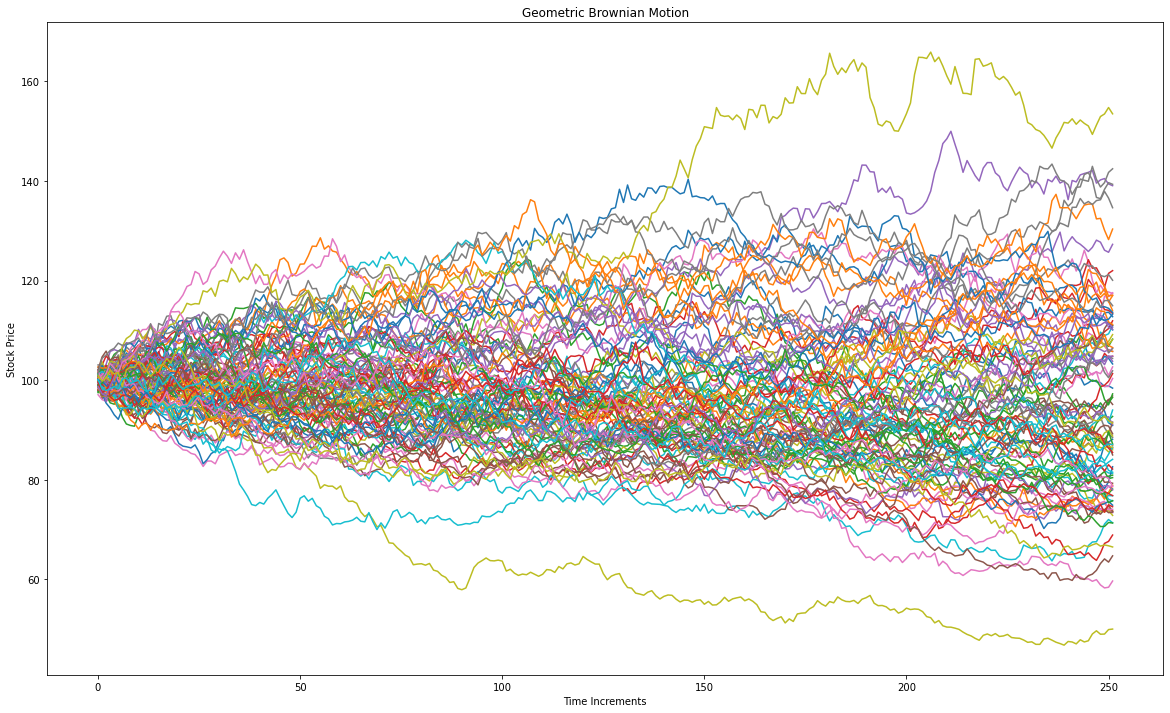

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def geo_paths(S, T, r, q, sigma, steps, N):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # [steps,N] Matrix of asset paths 
    """
    dt = T/steps
    #S_{T} = ln(S_{0})+\int_{0}^T(\mu-\frac{\sigma^2}{2})dt+\int_{0}^T \sigma dW(t)
    ST = np.log(S) +  np.cumsum(((r - q - sigma**2/2)*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=(steps,N))),axis=0)
    
    return np.exp(ST)

S = 100 #stock price S_{0}
K = 99 # strike
T = 1 # time to maturity
r = 0.01 # risk free risk in annual %
q = 0.02 # annual dividend rate
sigma = 0.20 # annual volatility in %
steps = 252 # time steps
N = 100 # number of trials

paths= geo_paths(S,T,r, q,sigma,steps,N)

plt.figure(figsize=(20, 12))
plt.plot(paths);
plt.xlabel("Time Increments")
plt.ylabel("Stock Price")
plt.title("Geometric Brownian Motion")

In [3]:
from scipy.stats import norm

def black_scholes_call(S,K,T,r,q,sigma):
    """
    Inputs
    #S = Current stock Price
    #K = Strike Price
    #T = Time to maturity 1 year = 1, 1 months = 1/12
    #r = risk free interest rate
    #q = dividend yield
    # sigma = volatility 
    
    Output
    # call_price = value of the option 
    """
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / sigma*np.sqrt(T)
    d2 = d1 - sigma* np.sqrt(T)
    
    call = S * np.exp(-q*T)* norm.cdf(d1) - K * np.exp(-r*T)*norm.cdf(d2)
    return call



payoffs = np.maximum(paths[-1]-K, 0)
option_price = np.mean(payoffs)*np.exp(-r*T) #discounting back to present value

bs_price = black_scholes_call(S,K,T,r,q,sigma)

print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price is {option_price}")

Black Scholes Price is 7.810109290966942
Simulated price is 6.5603811540211785


In [3]:
N0=100
N1=1000
N2=10000
paths0= geo_paths(S, T, r, q,sigma, steps, N0)
paths1= geo_paths(S, T, r, q,sigma, steps, N1)
paths2= geo_paths(S, T, r, q,sigma, steps, N2)
payoffs0 = np.maximum(paths0[-1]-K, 0)
option_price0 = np.exp(-r*T)*np.mean(payoffs0)
payoffs1 = np.maximum(paths1[-1]-K, 0)
option_price1 = np.exp(-r*T)*np.mean(payoffs1)
payoffs2 = np.maximum(paths2[-1]-K, 0)
option_price2 = np.exp(-r*T)*np.mean(payoffs2)

#bs_price = black_scholes_call(S,K,T,r,q,sigma)

#print(f"Black Scholes Price is {bs_price}")
print(f"Simulated price for N = ", N0, "\n", option_price0)
print(f"Simulated price for N = ", N1, "\n", option_price1)
print(f"Simulated price for N = ", N2, "\n", option_price2)

Simulated price for N =  100 
 7.302970042806115
Simulated price for N =  1000 
 7.881349235254688
Simulated price for N =  10000 
 8.093027688832635


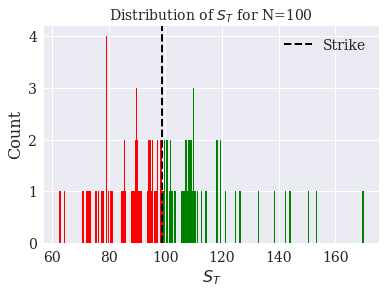

In [4]:
n, bins, patches = plt.hist(paths0[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$ for N=100 ")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

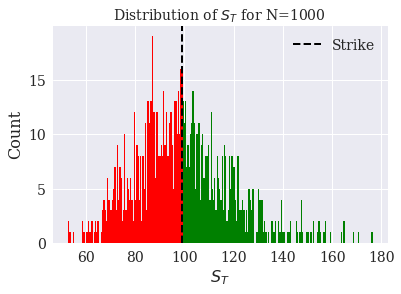

In [5]:
n, bins, patches = plt.hist(paths1[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$ for N=1000 ")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

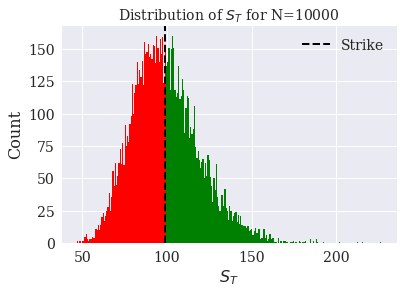

In [6]:
n, bins, patches = plt.hist(paths2[-1],bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')

plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Distribution of $S_{T}$ for N=10000 ")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

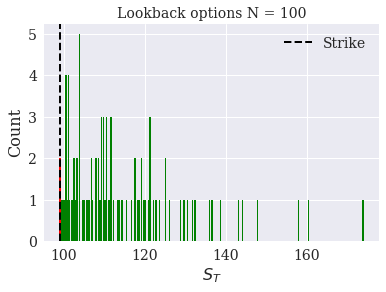

In [31]:
max_=np.max(paths0,axis=0)
n, bins, patches = plt.hist(max_,bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')
plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Lookback options N = 100")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

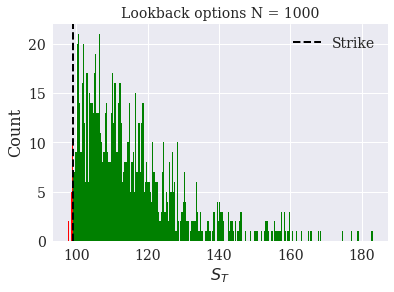

In [32]:
max_=np.max(paths1,axis=0)
n, bins, patches = plt.hist(max_,bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')
plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Lookback options N = 1000")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

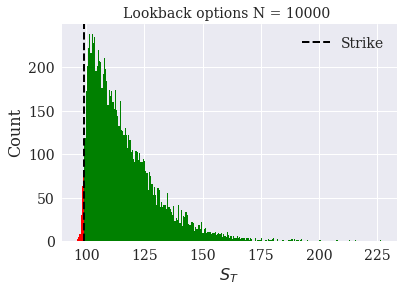

In [33]:
max_=np.max(paths2,axis=0)
n, bins, patches = plt.hist(max_,bins=250);
for c, p in zip(bins, patches):
    if c > K:
        plt.setp(p, 'facecolor', 'green')
    else:
        plt.setp(p, 'facecolor', 'red')
plt.axvline(K, color='black', linestyle='dashed', linewidth=2,label="Strike")
plt.title("Lookback options N = 10000 ")
plt.xlabel("$S_{T}$")
plt.ylabel('Count')
plt.legend()

In [34]:
max_0=np.max(paths0,axis=0)
payoffs0 = np.maximum(max_0-K, 0)
lookback_price0 = np.mean(payoffs0)*np.exp(-r*T)


max_1=np.max(paths1,axis=0)
payoffs1 = np.maximum(max_1-K, 0)
lookback_price1 = np.mean(payoffs1)*np.exp(-r*T)


max_2=np.max(paths2,axis=0)
payoffs2 = np.maximum(max_2-K, 0)
lookback_price2 = np.mean(payoffs2)*np.exp(-r*T)


print(f"lookback price for N = {N0} is {lookback_price0}")
print(f"lookback price for N = {N1} is {lookback_price1}")
print(f"lookback price for N = {N2} is {lookback_price2}")

lookback price for N = 100 is 15.026655973286402
lookback price for N = 1000 is 16.542278961940145
lookback price for N = 10000 is 16.72186292732267
